In [1]:
from sklearn.datasets import load_iris
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
params = {'objective' : 'multi:softmax', 'num_class' : 3, 'gamma' : 0.1, 'max_depth' : 6, 'lambda' : 2, 'eta':0.1}

In [7]:
dtrain = xgb.DMatrix(X_train, y_train)
num_rounds = 500
model = xgb.train(params, dtrain, num_rounds)

In [8]:
dtest = xgb.DMatrix(X_test)
ans = model.predict(dtest)

In [9]:
cnt1, cnt2 = 0, 0
for i in range(len(y_test)):
    if ans[i] == y_test[i]:
        cnt1 += 1
    else:
        cnt2 += 2
print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

Accuracy: 100.00 % 


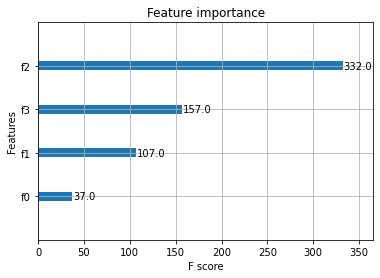

In [10]:
plot_importance(model)
plt.show()

In [12]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])